In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import copy
from pandas.plotting import register_matplotlib_converters
from sklearn import linear_model
from sklearn.metrics import r2_score
import copy
import os

In [2]:
watershed = 'AndrewsForest'

In [3]:
table = pd.read_csv('4_'+watershed+'_ClimateCatalog.csv',header = 0,index_col = 'DateTime',
                    parse_dates = True, infer_datetime_format = True,low_memory=False)

In [4]:
table_flag = pd.read_csv('4_'+watershed+'_ClimateCatalog_Flag.csv',header = 0,index_col = 'DateTime',
                    parse_dates = True, infer_datetime_format = True,low_memory=False)

In [5]:
table.head(2)

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
1949-10-01            2858.3         31.582800         26.234100   
1949-10-02             311.3         31.554836         26.211326   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
1949-10-01         40.072800           5.94300          4.414800   
1949-10-02         40.038329           5.94186          4.413975   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
1949-10-01            7.3863          1.613100          3.480900   
1949-10-02            7.3849          1.612876          3.480439   

            GSWSMA_Discharge  ...  PRIMET_SoilMoisture_50cm  \
DateTime                      ...                             
1949-10-01               NaN  ...                       NaN   
1949-10-02               NaN  ...                       NaN   

            PRIMET_SoilMoisture_100cm  UPLMET_SoilMoisture_10cm  \
DateTime                                                          
1949-10-01                        NaN                       NaN   
1949-10-02                        NaN                       NaN   

            UPLMET_SoilMoisture_20cm  UPLMET_SoilMoisture_50cm  \
DateTime                                                         
1949-10-01                       NaN                       NaN   
1949-10-02                       NaN                       NaN   

            UPLMET_SoilMoisture_100cm  VANMET_SoilMoisture_10cm  \
DateTime                                                          
1949-10-01                        NaN                       NaN   
1949-10-02                        NaN                       NaN   

            VANMET_SoilMoisture_20cm  VANMET_SoilMoisture_50cm  \
DateTime                                                         
1949-10-01                       NaN                       NaN   
1949-10-02                       NaN                       NaN   

            VANMET_SoilMoisture_100cm  
DateTime                               
1949-10-01                        NaN  
1949-10-02                        NaN  

[2 rows x 150 columns]

In [6]:
table = copy.deepcopy(table.loc['1957-10-01':])
table.head(2)

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
1957-10-01             566.0            2.8017            2.8017   
1957-10-02             877.3            9.6220            7.4995   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
1957-10-01            5.7449          0.669211          0.243525   
1957-10-02           15.3952          1.284938          0.761244   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
1957-10-01          0.425812          0.640602          0.480104   
1957-10-02          1.266446          1.159658          1.305325   

            GSWSMA_Discharge  ...  PRIMET_SoilMoisture_50cm  \
DateTime                      ...                             
1957-10-01               NaN  ...                       NaN   
1957-10-02               NaN  ...                       NaN   

            PRIMET_SoilMoisture_100cm  UPLMET_SoilMoisture_10cm  \
DateTime                                                          
1957-10-01                        NaN                       NaN   
1957-10-02                        NaN                       NaN   

            UPLMET_SoilMoisture_20cm  UPLMET_SoilMoisture_50cm  \
DateTime                                                         
1957-10-01                       NaN                       NaN   
1957-10-02                       NaN                       NaN   

            UPLMET_SoilMoisture_100cm  VANMET_SoilMoisture_10cm  \
DateTime                                                          
1957-10-01                        NaN                       NaN   
1957-10-02                        NaN                       NaN   

            VANMET_SoilMoisture_20cm  VANMET_SoilMoisture_50cm  \
DateTime                                                         
1957-10-01                       NaN                       NaN   
1957-10-02                       NaN                       NaN   

            VANMET_SoilMoisture_100cm  
DateTime                               
1957-10-01                        NaN  
1957-10-02                        NaN  

[2 rows x 150 columns]

In [7]:
table_flag = copy.deepcopy(table_flag.loc['1957-10-01':])
table_flag.head(2)

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
1957-10-01               1.0               1.0               1.0   
1957-10-02               1.0               1.0               1.0   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
1957-10-01               1.0               3.0               3.0   
1957-10-02               1.0               3.0               3.0   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
1957-10-01               3.0               3.0               3.0   
1957-10-02               3.0               3.0               3.0   

            GSWSMA_Discharge  ...  PRIMET_SoilMoisture_50cm  \
DateTime                      ...                             
1957-10-01               NaN  ...                       NaN   
1957-10-02               NaN  ...                       NaN   

            PRIMET_SoilMoisture_100cm  UPLMET_SoilMoisture_10cm  \
DateTime                                                          
1957-10-01                        NaN                       NaN   
1957-10-02                        NaN                       NaN   

            UPLMET_SoilMoisture_20cm  UPLMET_SoilMoisture_50cm  \
DateTime                                                         
1957-10-01                       NaN                       NaN   
1957-10-02                       NaN                       NaN   

            UPLMET_SoilMoisture_100cm  VANMET_SoilMoisture_10cm  \
DateTime                                                          
1957-10-01                        NaN                       NaN   
1957-10-02                        NaN                       NaN   

            VANMET_SoilMoisture_20cm  VANMET_SoilMoisture_50cm  \
DateTime                                                         
1957-10-01                       NaN                       NaN   
1957-10-02                       NaN                       NaN   

            VANMET_SoilMoisture_100cm  
DateTime                               
1957-10-01                        NaN  
1957-10-02                        NaN  

[2 rows x 150 columns]

In [8]:
table.tail(3)

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
2019-09-28               NaN            1.8112            2.9998   
2019-09-29               NaN            1.8961            2.5187   
2019-09-30               NaN            1.4716            2.3772   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
2019-09-28            4.7261            0.0566            0.1698   
2019-09-29            3.4526            0.0566            0.1415   
2019-09-30            2.9432            0.0283            0.1415   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
2019-09-28            0.3962            0.0849            0.1698   
2019-09-29            0.3679            0.1132            0.1132   
2019-09-30            0.3113            0.0849            0.0849   

            GSWSMA_Discharge  ...  PRIMET_SoilMoisture_50cm  \
DateTime                      ...                             
2019-09-28           34.2996  ...                       NaN   
2019-09-29           31.5828  ...                       NaN   
2019-09-30           27.2246  ...                       NaN   

            PRIMET_SoilMoisture_100cm  UPLMET_SoilMoisture_10cm  \
DateTime                                                          
2019-09-28                        NaN                       NaN   
2019-09-29                        NaN                       NaN   
2019-09-30                        NaN                       NaN   

            UPLMET_SoilMoisture_20cm  UPLMET_SoilMoisture_50cm  \
DateTime                                                         
2019-09-28                       NaN                       NaN   
2019-09-29                       NaN                       NaN   
2019-09-30                       NaN                       NaN   

            UPLMET_SoilMoisture_100cm  VANMET_SoilMoisture_10cm  \
DateTime                                                          
2019-09-28                        NaN                       NaN   
2019-09-29                        NaN                       NaN   
2019-09-30                        NaN                       NaN   

            VANMET_SoilMoisture_20cm  VANMET_SoilMoisture_50cm  \
DateTime                                                         
2019-09-28                       NaN                       NaN   
2019-09-29                       NaN                       NaN   
2019-09-30                       NaN                       NaN   

            VANMET_SoilMoisture_100cm  
DateTime                               
2019-09-28                        NaN  
2019-09-29                        NaN  
2019-09-30                        NaN  

[3 rows x 150 columns]

In [9]:
table.to_csv('5_'+watershed+'_final_cleaned.csv', sep=',')

In [10]:
table_flag.to_csv('5_'+watershed+'_final_cleaned_flag.csv', sep=',')

### Add the isotope data

In [11]:
Isotope = pd.read_csv('1_'+ watershed + '_Download_Aggregation_Isotope.csv',index_col='DateTime')
Isotope.index.rename('DateTime',inplace = True)
Isotope.head(2)

TributaryNoName_Isotope_δ2H_discharge  \
DateTime                                            
2014-07-12                                    NaN   
2014-08-11                                    NaN   

            TributaryNoName_Isotope_δ18O_discharge  \
DateTime                                             
2014-07-12                                     NaN   
2014-08-11                                     NaN   

            McRaeCreek_Isotope_δ2H_discharge  \
DateTime                                       
2014-07-12                               NaN   
2014-08-11                               NaN   

            McRaeCreek_Isotope_δ18O_discharge  \
DateTime                                        
2014-07-12                                NaN   
2014-08-11                                NaN   

            UpperLookout_Isotope_δ2H_discharge  \
DateTime                                         
2014-07-12                                 NaN   
2014-08-11                                 NaN   

            UpperLookout_Isotope_δ18O_discharge  \
DateTime                                          
2014-07-12                                  NaN   
2014-08-11                                  NaN   

            MackCreek_Isotope_δ2H_discharge  MackCreek_Isotope_δ18O_discharge  \
DateTime                                                                        
2014-07-12                              NaN                               NaN   
2014-08-11                              NaN                               NaN   

            NostocCreek_Isotope_δ2H_discharge  \
DateTime                                        
2014-07-12                                NaN   
2014-08-11                                NaN   

            NostocCreek_Isotope_δ18O_discharge  ...  \
DateTime                                        ...   
2014-07-12                                 NaN  ...   
2014-08-11                                 NaN  ...   

            ScheeleCreek_Isotope_δ2H_discharge  \
DateTime                                         
2014-07-12                             -57.855   
2014-08-11                                 NaN   

            ScheeleCreek_Isotope_δ18O_discharge  \
DateTime                                          
2014-07-12                               -8.627   
2014-08-11                                  NaN   

            TumtumRiverBurntWoods_Isotope_δ2H_discharge  \
DateTime                                                  
2014-07-12                                      -53.238   
2014-08-11                                          NaN   

            TumtumRiverBurntWoods_Isotope_δ18O_discharge  \
DateTime                                                   
2014-07-12                                        -8.161   
2014-08-11                                           NaN   

            TumtumRiverHwy20_Isotope_δ2H_discharge  \
DateTime                                             
2014-07-12                                 -54.055   
2014-08-11                                     NaN   

            TumtumRiverHwy20_Isotope_δ18O_discharge  \
DateTime                                              
2014-07-12                                   -8.225   
2014-08-11                                      NaN   

            TumtumRiverTumTumRd_Isotope_δ2H_discharge  \
DateTime                                                
2014-07-12                                    -54.696   
2014-08-11                                        NaN   

            TumtumRiverTumTumRd_Isotope_δ18O_discharge  \
DateTime                                                 
2014-07-12                                      -8.251   
2014-08-11                                         NaN   

            WoodsCreekNF2005_Isotope_δ2H_discharge  \
DateTime                                             
2014-07-12                                 -58.707   
2014-08-11                                     NaN   

            WoodsCreekNF2005_Isotope_δ18O_

In [12]:
result = copy.deepcopy(table.join(Isotope,how ='outer'))
result.index.rename('DateTime',inplace = True)
result.head(2)

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
1957-10-01             566.0            2.8017            2.8017   
1957-10-02             877.3            9.6220            7.4995   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
1957-10-01            5.7449          0.669211          0.243525   
1957-10-02           15.3952          1.284938          0.761244   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
1957-10-01          0.425812          0.640602          0.480104   
1957-10-02          1.266446          1.159658          1.305325   

            GSWSMA_Discharge  ...  ScheeleCreek_Isotope_δ2H_discharge  \
DateTime                      ...                                       
1957-10-01               NaN  ...                                 NaN   
1957-10-02               NaN  ...                                 NaN   

            ScheeleCreek_Isotope_δ18O_discharge  \
DateTime                                          
1957-10-01                                  NaN   
1957-10-02                                  NaN   

            TumtumRiverBurntWoods_Isotope_δ2H_discharge  \
DateTime                                                  
1957-10-01                                          NaN   
1957-10-02                                          NaN   

            TumtumRiverBurntWoods_Isotope_δ18O_discharge  \
DateTime                                                   
1957-10-01                                           NaN   
1957-10-02                                           NaN   

            TumtumRiverHwy20_Isotope_δ2H_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   

            TumtumRiverHwy20_Isotope_δ18O_discharge  \
DateTime                                              
1957-10-01                                      NaN   
1957-10-02                                      NaN   

            TumtumRiverTumTumRd_Isotope_δ2H_discharge  \
DateTime                                                
1957-10-01                                        NaN   
1957-10-02                                        NaN   

            TumtumRiverTumTumRd_Isotope_δ18O_discharge  \
DateTime                                                 
1957-10-01                                         NaN   
1957-10-02                                         NaN   

            WoodsCreekNF2005_Isotope_δ2H_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   

            WoodsCreekNF2005_Isotope_δ18O_discharge  
DateTime                                             
1957-10-01                                      NaN  
1957-10-02                                      NaN  

[2 rows x 226 columns]

In [13]:
result.to_csv('5_'+watershed+'_final_cleaned.csv', sep=',')

In [14]:
isotope_flag = np.nan*np.ones([table.shape[0] , len(Isotope.columns)])
df_isotope_flag = pd.DataFrame(isotope_flag, index=table_flag.index, columns=Isotope.columns) 
df_isotope_flag.head(2)

TributaryNoName_Isotope_δ2H_discharge  \
DateTime                                            
1957-10-01                                    NaN   
1957-10-02                                    NaN   

            TributaryNoName_Isotope_δ18O_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   

            McRaeCreek_Isotope_δ2H_discharge  \
DateTime                                       
1957-10-01                               NaN   
1957-10-02                               NaN   

            McRaeCreek_Isotope_δ18O_discharge  \
DateTime                                        
1957-10-01                                NaN   
1957-10-02                                NaN   

            UpperLookout_Isotope_δ2H_discharge  \
DateTime                                         
1957-10-01                                 NaN   
1957-10-02                                 NaN   

            UpperLookout_Isotope_δ18O_discharge  \
DateTime                                          
1957-10-01                                  NaN   
1957-10-02                                  NaN   

            MackCreek_Isotope_δ2H_discharge  MackCreek_Isotope_δ18O_discharge  \
DateTime                                                                        
1957-10-01                              NaN                               NaN   
1957-10-02                              NaN                               NaN   

            NostocCreek_Isotope_δ2H_discharge  \
DateTime                                        
1957-10-01                                NaN   
1957-10-02                                NaN   

            NostocCreek_Isotope_δ18O_discharge  ...  \
DateTime                                        ...   
1957-10-01                                 NaN  ...   
1957-10-02                                 NaN  ...   

            ScheeleCreek_Isotope_δ2H_discharge  \
DateTime                                         
1957-10-01                                 NaN   
1957-10-02                                 NaN   

            ScheeleCreek_Isotope_δ18O_discharge  \
DateTime                                          
1957-10-01                                  NaN   
1957-10-02                                  NaN   

            TumtumRiverBurntWoods_Isotope_δ2H_discharge  \
DateTime                                                  
1957-10-01                                          NaN   
1957-10-02                                          NaN   

            TumtumRiverBurntWoods_Isotope_δ18O_discharge  \
DateTime                                                   
1957-10-01                                           NaN   
1957-10-02                                           NaN   

            TumtumRiverHwy20_Isotope_δ2H_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   

            TumtumRiverHwy20_Isotope_δ18O_discharge  \
DateTime                                              
1957-10-01                                      NaN   
1957-10-02                                      NaN   

            TumtumRiverTumTumRd_Isotope_δ2H_discharge  \
DateTime                                                
1957-10-01                                        NaN   
1957-10-02                                        NaN   

            TumtumRiverTumTumRd_Isotope_δ18O_discharge  \
DateTime                                                 
1957-10-01                                         NaN   
1957-10-02                                         NaN   

            WoodsCreekNF2005_Isotope_δ2H_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   

            WoodsCreekNF2005_Isotope_δ18O_

In [15]:
result_flag = copy.deepcopy(table_flag.join(df_isotope_flag,how ='outer'))
result_flag.index.rename('DateTime',inplace = True)
result_flag.head(2)

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
1957-10-01               1.0               1.0               1.0   
1957-10-02               1.0               1.0               1.0   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
1957-10-01               1.0               3.0               3.0   
1957-10-02               1.0               3.0               3.0   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
1957-10-01               3.0               3.0               3.0   
1957-10-02               3.0               3.0               3.0   

            GSWSMA_Discharge  ...  ScheeleCreek_Isotope_δ2H_discharge  \
DateTime                      ...                                       
1957-10-01               NaN  ...                                 NaN   
1957-10-02               NaN  ...                                 NaN   

            ScheeleCreek_Isotope_δ18O_discharge  \
DateTime                                          
1957-10-01                                  NaN   
1957-10-02                                  NaN   

            TumtumRiverBurntWoods_Isotope_δ2H_discharge  \
DateTime                                                  
1957-10-01                                          NaN   
1957-10-02                                          NaN   

            TumtumRiverBurntWoods_Isotope_δ18O_discharge  \
DateTime                                                   
1957-10-01                                           NaN   
1957-10-02                                           NaN   

            TumtumRiverHwy20_Isotope_δ2H_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   

            TumtumRiverHwy20_Isotope_δ18O_discharge  \
DateTime                                              
1957-10-01                                      NaN   
1957-10-02                                      NaN   

            TumtumRiverTumTumRd_Isotope_δ2H_discharge  \
DateTime                                                
1957-10-01                                        NaN   
1957-10-02                                        NaN   

            TumtumRiverTumTumRd_Isotope_δ18O_discharge  \
DateTime                                                 
1957-10-01                                         NaN   
1957-10-02                                         NaN   

            WoodsCreekNF2005_Isotope_δ2H_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   

            WoodsCreekNF2005_Isotope_δ18O_discharge  
DateTime                                             
1957-10-01                                      NaN  
1957-10-02                                      NaN  

[2 rows x 226 columns]

In [16]:
result_flag.to_csv('5_'+watershed+'_final_cleaned_flag.csv', sep=',')

### Track the exact time range

In [17]:
var_array = pd.Series([i.split('_')[1] for i in result.columns]).unique()
for var in var_array:
    #var = 'SoilMoisture'
    #print(var)
    var_column = []
    for k in result.columns:
        if k.split('_')[1] == var:
            var_column.append(k)
    var_table = result[var_column]
    #display(var_table.head(2))
    for i in range(var_table.shape[0]):
        
        if any(var_table.iloc[i,:].notnull()) == True: # Any one of them is true
            print(var)
            #print(var_table.iloc[i,:])
            start = var_table.index[i]
            break
            
    for i in range(1,var_table.shape[0]):
        if any(var_table.iloc[-i,:].notnull()) == True: # Since some are empty
            print(var)
            over = var_table.index[-i]
            break
            
    print(var, str(start)[:-9], ',',str(over)[:-9])

Discharge
Discharge
Discharge 1957-10-01 , 2019-09-30
Precipitation
Precipitation
Precipitation 1957-10-01 , 2019-03-17
AirTemperature
AirTemperature
AirTemperature 1958-02-03 , 2019-03-25
SolarRadiation
SolarRadiation
SolarRadiation 1972-05-10 , 2018-09-30
RelativeHumidity
RelativeHumidity
RelativeHumidity 1987-06-17 , 2019-03-25
WindDirection
WindDirection
WindDirection 1987-10-30 , 2019-03-25
WindSpeed
WindSpeed
WindSpeed 1973-05-22 , 2019-03-25
SWE
SWE
SWE 1987-06-17 , 2014-10-01
SnowDepth
SnowDepth
SnowDepth 1997-09-30 , 2014-10-01
Snowmelt
Snowmelt
Snowmelt 1990-10-01 , 2019-09-30
VaporPressure
VaporPressure
VaporPressure 1988-07-07 , 2019-03-25
SoilTemperature
SoilTemperature
SoilTemperature 1987-06-17 , 2018-09-30
SoilMoisture
SoilMoisture
SoilMoisture 1998-06-05 , 2018-09-30
Isotope
Isotope
Isotope 2014-07-12 , 2016-09-06


In [18]:
result.head()

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
1957-10-01             566.0            2.8017            2.8017   
1957-10-02             877.3            9.6220            7.4995   
1957-10-03            1047.1            8.6598            7.0467   
1957-10-04            1132.0           15.1122            9.5937   
1957-10-05             962.2            6.0279            4.6412   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
1957-10-01            5.7449          0.669211          0.243525   
1957-10-02           15.3952          1.284938          0.761244   
1957-10-03           15.1405          1.620789          1.043637   
1957-10-04           21.2250          1.788715          1.184833   
1957-10-05           10.4144          1.452864          0.902441   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
1957-10-01          0.425812          0.640602          0.480104   
1957-10-02          1.266446          1.159658          1.305325   
1957-10-03          1.724974          1.086430          1.188904   
1957-10-04          1.954238          1.577487          1.969611   
1957-10-05          1.495710          0.886131          0.870457   

            GSWSMA_Discharge  ...  ScheeleCreek_Isotope_δ2H_discharge  \
DateTime                      ...                                       
1957-10-01               NaN  ...                                 NaN   
1957-10-02               NaN  ...                                 NaN   
1957-10-03               NaN  ...                                 NaN   
1957-10-04               NaN  ...                                 NaN   
1957-10-05               NaN  ...                                 NaN   

            ScheeleCreek_Isotope_δ18O_discharge  \
DateTime                                          
1957-10-01                                  NaN   
1957-10-02                                  NaN   
1957-10-03                                  NaN   
1957-10-04                                  NaN   
1957-10-05                                  NaN   

            TumtumRiverBurntWoods_Isotope_δ2H_discharge  \
DateTime                                                  
1957-10-01                                          NaN   
1957-10-02                                          NaN   
1957-10-03                                          NaN   
1957-10-04                                          NaN   
1957-10-05                                          NaN   

            TumtumRiverBurntWoods_Isotope_δ18O_discharge  \
DateTime                                                   
1957-10-01                                           NaN   
1957-10-02                                           NaN   
1957-10-03                                           NaN   
1957-10-04                                           NaN   
1957-10-05                                           NaN   

            TumtumRiverHwy20_Isotope_δ2H_discharge  \
DateTime                                             
1957-10-01                                     NaN   
1957-10-02                                     NaN   
1957-10-03                                     NaN   
1957-10-04                                     NaN   
1957-10-05                                     NaN   

            TumtumRiverHwy20_Isotope_δ18O_discharge  \
DateTime                                              
1957-10-01                                      NaN   
1957-10-02                                      NaN   
1957-10-03                                      NaN   
1957-10-04                                      NaN   
1957-10-05                                      NaN   

            TumtumRiverTumTumRd_Isotope_δ2H_discharge  \
DateTime                                              

In [19]:
result.tail()

GSLOOK_Discharge  GSWS01_Discharge  GSWS02_Discharge  \
DateTime                                                           
2019-09-26               NaN            1.2735            1.8678   
2019-09-27               NaN            1.1320            1.9527   
2019-09-28               NaN            1.8112            2.9998   
2019-09-29               NaN            1.8961            2.5187   
2019-09-30               NaN            1.4716            2.3772   

            GSWS03_Discharge  GSWS06_Discharge  GSWS07_Discharge  \
DateTime                                                           
2019-09-26            3.2545            0.0283            0.1132   
2019-09-27            3.1413            0.0283            0.1132   
2019-09-28            4.7261            0.0566            0.1698   
2019-09-29            3.4526            0.0566            0.1415   
2019-09-30            2.9432            0.0283            0.1415   

            GSWS08_Discharge  GSWS09_Discharge  GSWS10_Discharge  \
DateTime                                                           
2019-09-26            0.3113            0.0849            0.0849   
2019-09-27            0.2830            0.0849            0.0849   
2019-09-28            0.3962            0.0849            0.1698   
2019-09-29            0.3679            0.1132            0.1132   
2019-09-30            0.3113            0.0849            0.0849   

            GSWSMA_Discharge  ...  ScheeleCreek_Isotope_δ2H_discharge  \
DateTime                      ...                                       
2019-09-26           26.2058  ...                                 NaN   
2019-09-27           25.4417  ...                                 NaN   
2019-09-28           34.2996  ...                                 NaN   
2019-09-29           31.5828  ...                                 NaN   
2019-09-30           27.2246  ...                                 NaN   

            ScheeleCreek_Isotope_δ18O_discharge  \
DateTime                                          
2019-09-26                                  NaN   
2019-09-27                                  NaN   
2019-09-28                                  NaN   
2019-09-29                                  NaN   
2019-09-30                                  NaN   

            TumtumRiverBurntWoods_Isotope_δ2H_discharge  \
DateTime                                                  
2019-09-26                                          NaN   
2019-09-27                                          NaN   
2019-09-28                                          NaN   
2019-09-29                                          NaN   
2019-09-30                                          NaN   

            TumtumRiverBurntWoods_Isotope_δ18O_discharge  \
DateTime                                                   
2019-09-26                                           NaN   
2019-09-27                                           NaN   
2019-09-28                                           NaN   
2019-09-29                                           NaN   
2019-09-30                                           NaN   

            TumtumRiverHwy20_Isotope_δ2H_discharge  \
DateTime                                             
2019-09-26                                     NaN   
2019-09-27                                     NaN   
2019-09-28                                     NaN   
2019-09-29                                     NaN   
2019-09-30                                     NaN   

            TumtumRiverHwy20_Isotope_δ18O_discharge  \
DateTime                                              
2019-09-26                                      NaN   
2019-09-27                                      NaN   
2019-09-28                                      NaN   
2019-09-29                                      NaN   
2019-09-30                                      NaN   

            TumtumRiverTumTumRd_Isotope_δ2H_discharge  \
DateTime                                              

In [20]:
Isotope

TributaryNoName_Isotope_δ2H_discharge  \
DateTime                                            
2014-07-12                                    NaN   
2014-08-11                                    NaN   
2014-11-08                                    NaN   
2014-11-16                                    NaN   
2014-12-12                                    NaN   
2014-12-22                                    NaN   
2015-01-02                                    NaN   
2015-01-11                                    NaN   
2015-01-14                                    NaN   
2015-02-02                                    NaN   
2015-02-16                                    NaN   
2015-02-22                                    NaN   
2015-03-22                                    NaN   
2015-03-25                                    NaN   
2015-04-07                                    NaN   
2015-04-12                                    NaN   
2015-04-14                                    NaN   
2015-05-05                                    NaN   
2015-05-31                                    NaN   
2015-06-28                                    NaN   
2015-07-01                             -74.928200   
2015-07-02                             -74.823111   
2015-07-03                             -74.399000   
2015-07-29                                    NaN   
2015-09-05                                    NaN   
2015-09-07                                    NaN   
2015-09-08                                    NaN   
2015-09-09                             -75.508400   
2015-09-24                                    NaN   
2015-09-28                                    NaN   
2015-10-27                                    NaN   
2015-10-28                                    NaN   
2015-10-29                                    NaN   
2015-10-30                                    NaN   
2015-10-31                                    NaN   
2015-11-01                                    NaN   
2015-11-02                                    NaN   
2015-11-03                                    NaN   
2015-11-04                                    NaN   
2015-11-05                                    NaN   
2015-11-06                                    NaN   
2015-11-07                                    NaN   
2015-12-04                                    NaN   
2016-06-20                                    NaN   
2016-06-21                                    NaN   
2016-06-22                                    NaN   
2016-06-23                                    NaN   
2016-06-24                             -74.017000   
2016-06-25                                    NaN   
2016-06-29                             -74.832333   
2016-06-30                                    NaN   
2016-07-01                                    NaN   
2016-08-30                                    NaN   
2016-08-31                                    NaN   
2016-09-01                                    NaN   
2016-09-03                                    NaN   
2016-09-05                                    NaN   
2016-09-06                                    NaN   

            TributaryNoName_Isotope_δ18O_discharge  \
DateTime                                             
2014-07-12                                     NaN   
2014-08-11                                     NaN   
2014-11-08                                     NaN   
2014-11-16                                     NaN   
2014-12-12                                     NaN   
2014-12-22                                     NaN   
2015-01-02                                     NaN   
2015-01-11                                     NaN   
2015-01-14                                     NaN   
2015-02-02                                     NaN   
2015-02-16                                     NaN   
2015-02-22                                     NaN   
2015-03-22                                     NaN   
2015-03-25           

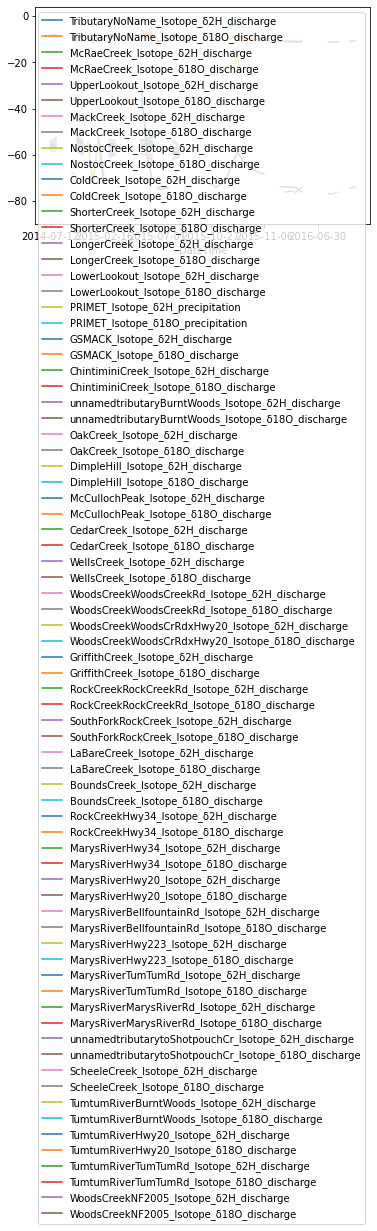

In [21]:
Isotope.plot()

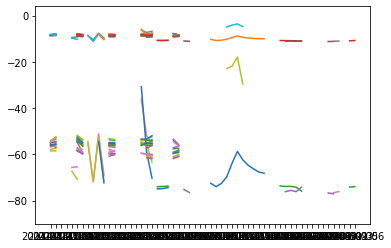

In [22]:
plt.plot(Isotope)